![Image Description](Final.png)

# <center>Using Machine Learning to Identify At-Risk Customers in Telecom </center>

This independent project was completed for the University of Maryland, with all code and written content created solely by me. The knowledge and resources used to complete this study were acquired from university coursework and reliable online sources.

### Introduction to the Code
This project aims to predict customer churn for a telecom company using machine learning techniques. The process involves loading and preprocessing the dataset, performing exploratory data analysis (EDA), addressing class imbalance, training various machine learning models, evaluating their performance, and saving the best model for deployment. Each step has been carefully designed to ensure accurate and meaningful predictions.
<a id='introduction-to-the-code'></a>


Over this tutorial we will be going through the Data Science Lifecycle as following:

* Data Collection
* Data Processing
* Exploratory Analysis & Data Visualization
* Model: Analysis & Machine Learning
* Interpretation: Insight & Policy Decision

### Table of Contents
1. [Introduction to the Code](#introduction-to-the-code)
2. [Part 1: Data Collection](#part-1-data-collection)
3. [Data Cleaning & Exploratory Analysis](#part-2-data-cleaning-exploratory-analysis)
4. [Part 3: Model Training and Testing](#part-3-model-training-and-testing)
5. [Part 4: Interpretation of Results](#part-4-interpretation-of-results)
6. [Conclusion](#conclusion)
7. [References](#references)


### Part 1: Data Collection
<a id='part-1-data-collection'></a>
In this section, we will collect all relevant data from several sources using Python. We will start by importing several relevant Python libraries for this study.

### Importing Libraries
* Pandas and NumPy: For data manipulation and numerical operations.
* Matplotlib and Seaborn: For visualizing data.
* Scikit-learn: For preprocessing, model building, and evaluation.

### Importing Data

The script begins by importing essential libraries. The combination of requests, zipfile, and os lays the foundation for handling data acquisition and file management. With these tools, the script can seamlessly download a ZIP file from the internet, extract its contents, and access the necessary files for further analysis. The integration of pandas ensures efficient data manipulation and exploration, while numpy adds support for numerical computations.

Moving into the visualization domain, matplotlib and seaborn empower the user to create insightful and aesthetically pleasing plots. These libraries allow the exploration of data patterns, trends, and relationships, which are critical in understanding the dataset before modeling.

In the machine learning phase, the script is armed with an arsenal of tools from scikit-learn. 

In [1]:
import requests
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc


### What is Web Scraping in Data Collection?
Web scraping involves programmatically extracting information from websites. It allows you to automate the process of retrieving specific data from web pages, such as text, images, tables, or entire datasets, which would otherwise need to be collected manually.



### Webscraping

This script simplifies the process of web scraping and working with data files hosted online. Designed with automation in mind, it is particularly useful for data analysts and researchers who regularly handle ZIP files containing datasets.

Here’s how it functions: the script begins by downloading a ZIP file from a specified URL using Python’s requests library. The downloaded file is saved locally as downloaded_file.zip. Once downloaded, the script uses Python's zipfile module to extract the ZIP file into a folder named extracted_files. This makes all the contents of the ZIP file readily available for further use.

Next, the script searches the extracted folder for an Excel file named churn.xlsx. If such a file is found, it uses the pandas library to load the data into a DataFrame, a highly versatile structure for data analysis in Python. The first few rows of the loaded dataset are printed, giving the user a quick preview of the data.

To keep things organized, the script includes an optional cleanup step. It deletes the downloaded ZIP file, and if needed, the extracted folder can also be removed. This ensures that unnecessary files do not clutter the workspace.

Overall, this script serves as a practical tool for automating repetitive tasks involved in downloading, extracting, and preparing data for analysis. Its straightforward design allows for easy adaptation to other datasets, making it an efficient solution for handling online data files.

In [2]:
# URL of the ZIP file
url = "https://public.dhe.ibm.com/software/data/sw-library/cognos/mobile/C11/data/Telecommunications_Industry.zip"

# Step 1: Download the ZIP file
zip_file_path = "downloaded_file.zip"
response = requests.get(url)
with open(zip_file_path, "wb") as file:
    file.write(response.content)

print(f"ZIP file downloaded to {zip_file_path}")

# Step 2: Extract the ZIP file
extracted_folder = "extracted_files"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print(f"ZIP file extracted to {extracted_folder}")

# Step 3: Find the Excel file and read it
# Assuming there is only one Excel file in the ZIP
excel_files = [f for f in os.listdir(extracted_folder) if f.endswith(('churn.xlsx'))]

if excel_files:
    excel_file_path = os.path.join(extracted_folder, excel_files[0])
    print(f"Reading Excel file: {excel_file_path}")
    df = pd.read_excel(excel_file_path)

    # Display the first few rows of the Excel file
    print(df.head())
else:
    print("No Excel files found in the ZIP.")

# Optional: Clean up downloaded ZIP and extracted files
os.remove(zip_file_path)
# Uncomment the next line to delete the extracted folder if needed
# import shutil; shutil.rmtree(extracted_folder)


ZIP file downloaded to downloaded_file.zip
ZIP file extracted to extracted_files
Reading Excel file: extracted_files/Telco_customer_churn.xlsx
   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.0

<a id='part-2-data-cleaning-exploratory-analysis'></a>
### Part 2: Data Cleaning & Exploratory Data Analysis (EDA)


Once we have our data, the next step is to clean and prepare it so that it’s ready for analysis or modeling. Think of data cleaning as tidying up a messy room—you’re organizing and fixing things to make it easier to work with. This process might include:

- **Removing unnecessary data**: Getting rid of columns or rows that aren’t relevant.  
- **Handling missing data**: Filling in blanks or deciding to remove incomplete records.  
- **Standardizing formats**: Making sure all the data is consistent, like dates being in the same format.  
- **Creating new features**: Adding helpful information from the existing data, like calculating averages or groupings.  

We’ve also paired **Exploratory Data Analysis (EDA)** with data cleaning because they go hand in hand. EDA helps us better understand the dataset, and that understanding can guide the cleaning process. For example, plotting a graph might show outliers or patterns that highlight the need for adjustments, like removing extreme values or creating new features based on observed trends.

EDA is about exploring your data to uncover useful insights. It’s like investigating what your dataset can tell you before diving into modeling or predictions. Some common steps include:
- Plotting graphs to see distributions or trends.  
- Checking how features relate to each other, like with scatterplots or correlation charts.  
- Identifying patterns or important variables that stand out.  

By combining cleaning and EDA, we’re not only organizing our data but also uncovering insights that might shape how we approach the next steps. This is where we start making sense of our data and laying the groundwork for accurate predictions and meaningful analysis.

### Understanding the Dataset

Examining the shape, size, and features of the dataset. Checking for missing values, data types, and distributions.
The dataset contains 33 columns, with Churn Label (categorical) and Churn Value (binary: 0 or 1) serving as the primary target variables. The dataset shows a clear potential imbalance in the target column.

In [3]:
#Checking shape of the data set
df.shape

(7043, 33)

In [4]:
#checking size of the data set
df.size

232419

In [5]:
#Figuring out data types of each column
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [6]:
# Get the column names (features)
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [7]:
# Get summary statistics for numerical features
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


### Statistical Summary of the Dataset

#### General Information:
- **Total Observations**: 7,043
- **Missing Values**: None (all columns have complete data)

#### Key Metrics:

1. **Geographic Information**:
   - **Zip Code**:
     - Mean: 93,521.96
     - Range: 90,001 to 96,161
     - Standard Deviation: 1,865.79
   - **Latitude**:
     - Mean: 36.28
     - Range: 32.56 to 41.96
     - Standard Deviation: 2.45
   - **Longitude**:
     - Mean: -119.80
     - Range: -124.30 to -114.19
     - Standard Deviation: 2.16

2. **Tenure (Months)**:
   - Mean: 32.37 months
   - Median: 29 months
   - Range: 0 to 72 months
   - Standard Deviation: 24.56 months
   - Quartiles:
     - 25%: 9 months
     - 75%: 55 months

3. **Monthly Charges**:
   - Mean: $64.76
   - Median: $70.35
   - Range: $18.25 to $118.75
   - Standard Deviation: $30.09
   - Quartiles:
     - 25%: $35.50
     - 75%: $89.85

4. **Churn**:
   - **Churn Value (Binary Indicator)**:
     - Mean Churn Rate: 26.5% (0.265)
     - Values range from 0 (no churn) to 1 (churn)
   - **Churn Score**:
     - Mean: 58.70
     - Median: 61
     - Range: 5 to 100
     - Standard Deviation: 21.52
     - Quartiles:
       - 25%: 40
       - 75%: 75

5. **Customer Lifetime Value (CLTV)**:
   - Mean: $4,400.30
   - Median: $4,527.00
   - Range: $2,003 to $6,500
   - Standard Deviation: $1,183.06
   - Quartiles:
     - 25%: $3,469.00
     - 75%: $5,380.50

#### Summary Notes:
- The dataset provides comprehensive information about customer tenure, charges, churn behavior, and geographic distribution.
- Key variables such as **Monthly Charges**, **Tenure Months**, and **Churn Score** show significant variability, highlighting diverse customer profiles.
- The **Churn Rate** indicates that 26.5% of customers have churned, which could be a focus area for predictive modeling.

This summary can be used for exploratory data analysis, feature engineering, and documentation purposes in your project.

In [8]:
# Get information about data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [9]:
# View the first few rows of the dataset
df.head(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [10]:
# Checking for missing values in each column
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [11]:
#To count the number of unique values in each column of a DataFrame
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [12]:
# check for duplicate values
print(df.duplicated().sum())

0


In [13]:
print(df['Churn Reason'].value_counts())


Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

### Distribution of Categorical columns

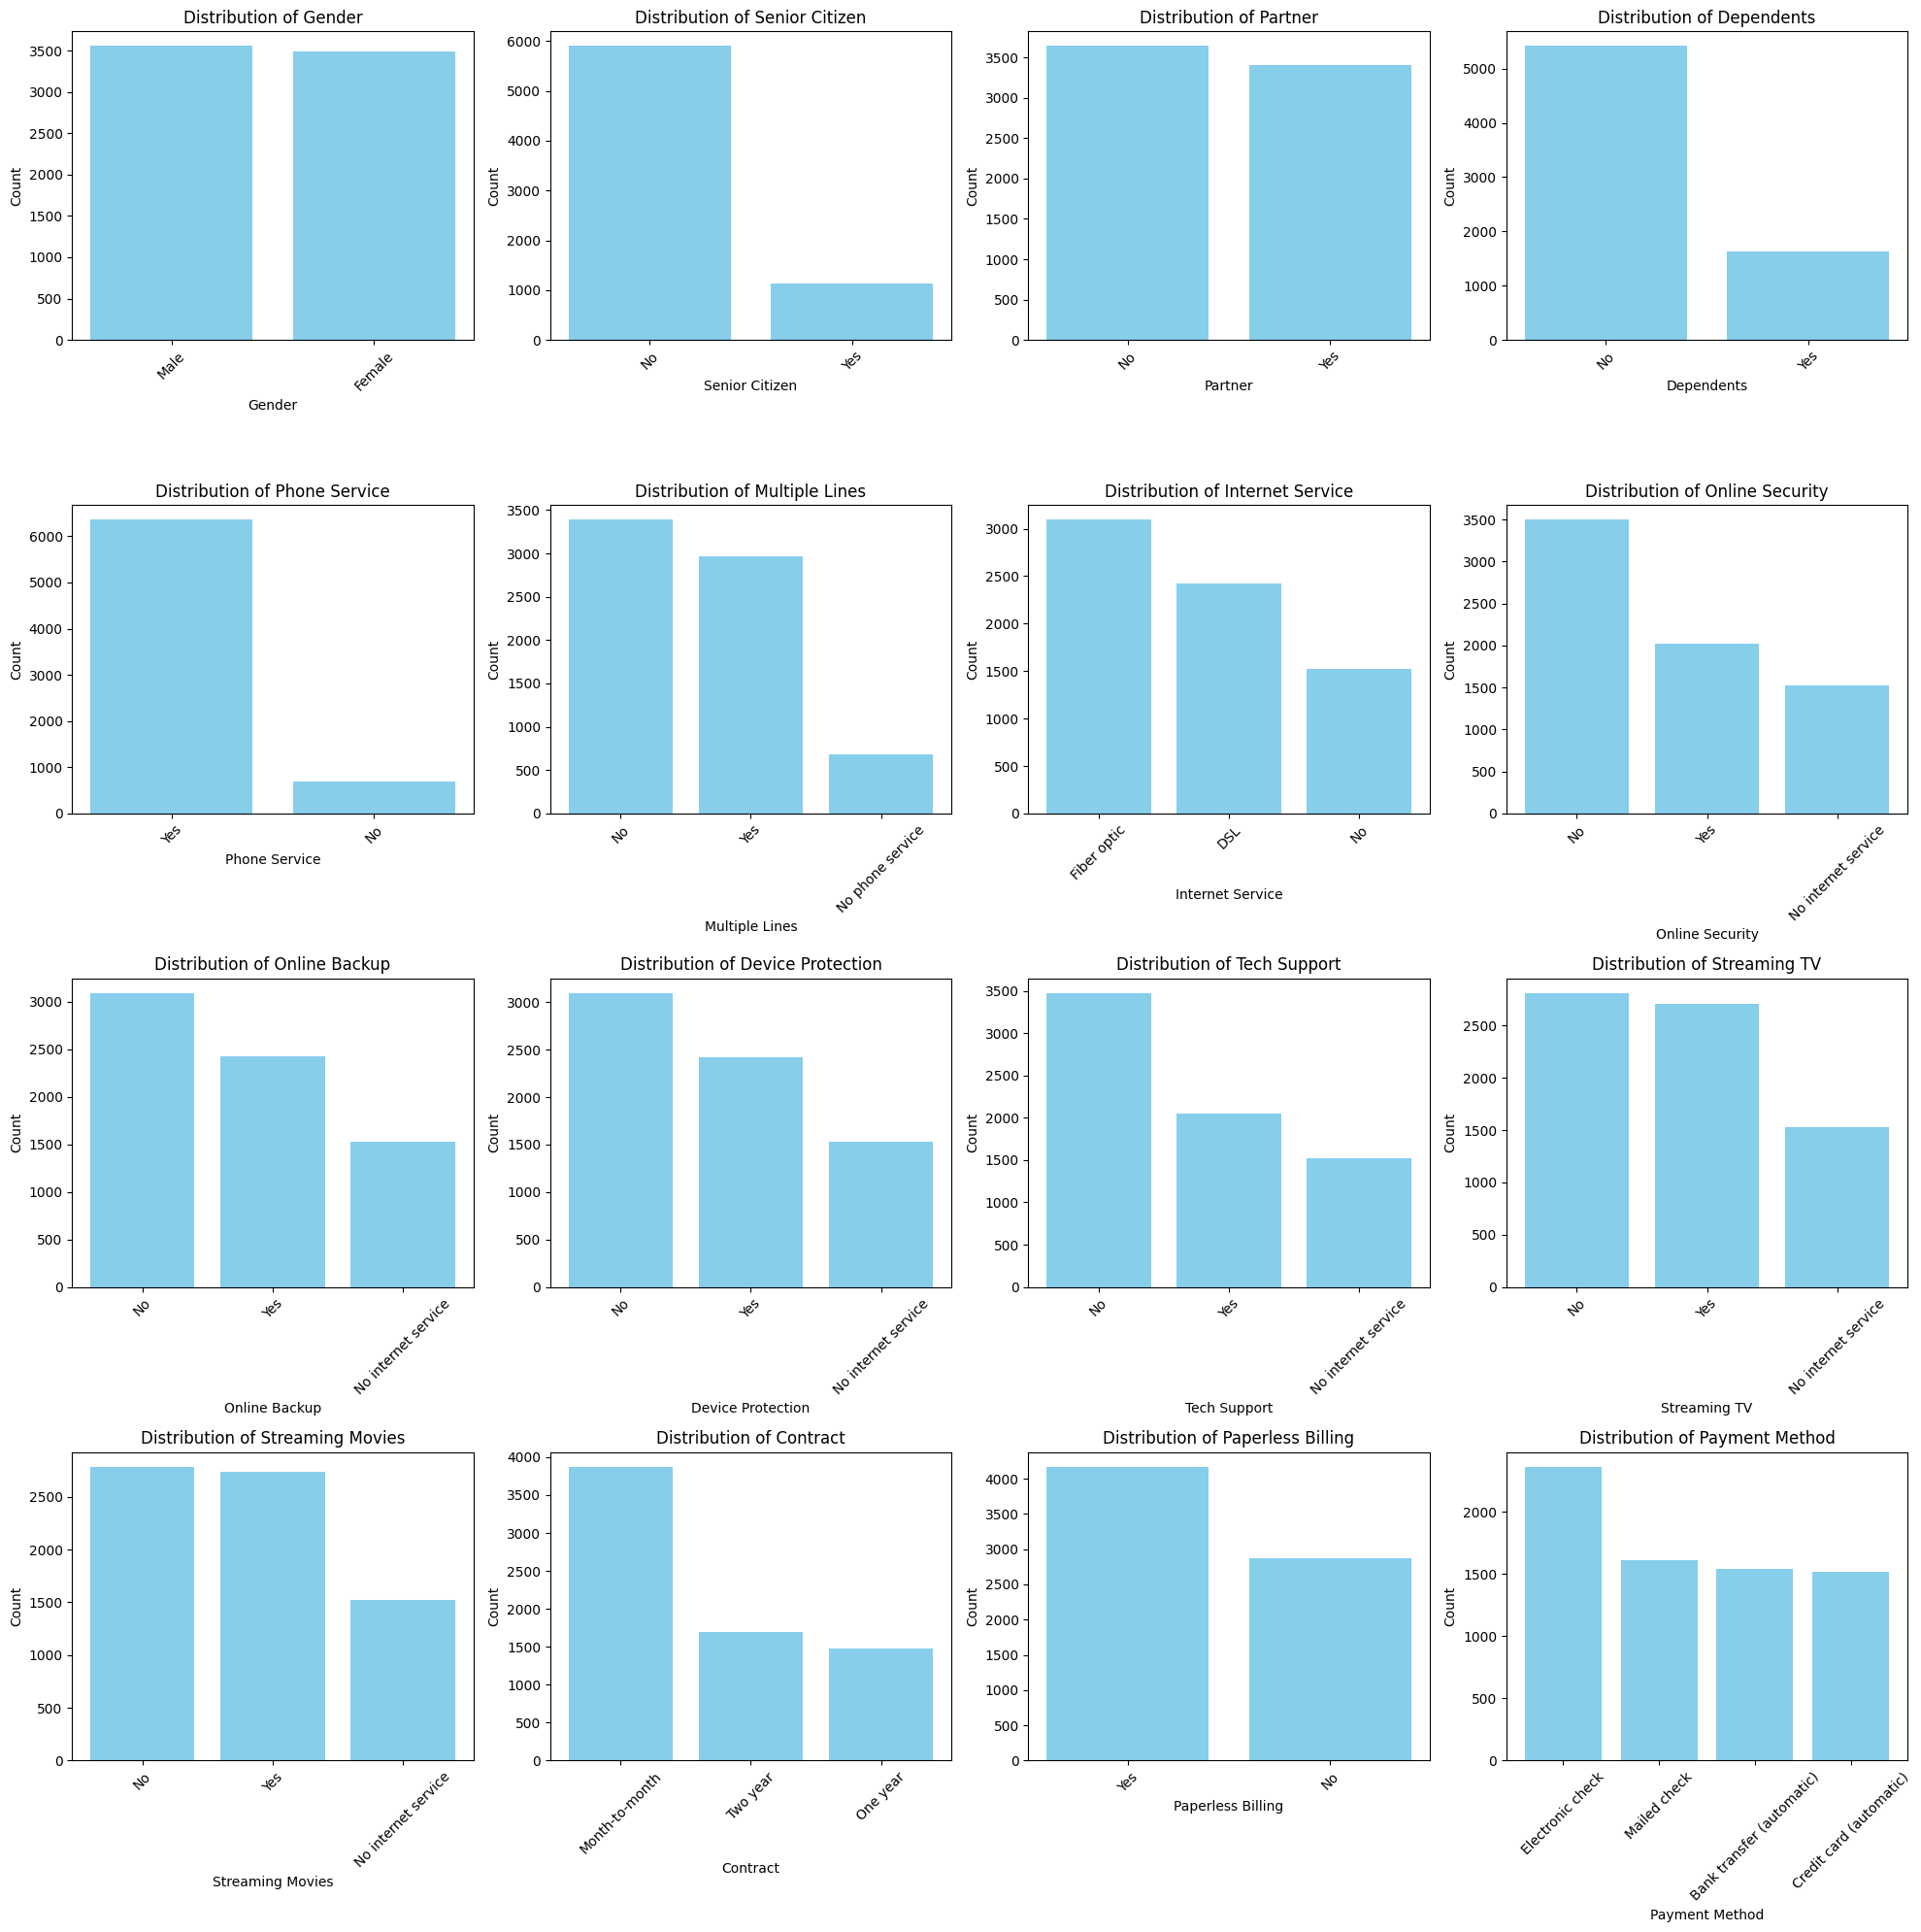

In [14]:
def distribution_categorical(data, categorical_columns):

    num_cols = 4  # Number of columns in the grid
    num_rows = -(-len(categorical_columns) // num_cols)  # Calculate rows with ceiling division

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for idx, col in enumerate(categorical_columns):
        value_counts = data[col].value_counts()
        
        axes[idx].bar(value_counts.index, value_counts.values, color='skyblue')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)

    # Hide any unused subplots
    for idx in range(len(categorical_columns), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
categorical_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents',
                       'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 
                       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 
                       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']

distribution_categorical(df, categorical_columns)


The `distribution_categorical` function is designed to visualize the distribution of categorical columns in a dataset by generating bar plots using Matplotlib. This is particularly useful during exploratory data analysis (EDA) to understand the frequency and spread of different categories in the dataset.

### Key Features and Workflow:

1. **Parameters**:
   - `data (pd.DataFrame)`: The input dataset, typically in the form of a pandas DataFrame.
   - `categorical_columns (list)`: A list of categorical column names whose distributions need to be plotted.

2. **Dynamic Grid Layout**:
   - The function automatically determines the number of rows and columns required for the grid layout of subplots. 
   - It divides the total number of columns into a grid with four columns per row, calculating the necessary rows using ceiling division.

3. **Bar Plot Creation**:
   - For each categorical column in the list:
     - The function computes the frequency of each category using `value_counts()`.
     - It creates a bar plot for the distribution of values within the column.
     - The plot includes a title, x-axis label (the column name), and y-axis label ("Count").

4. **Unused Subplots**:
   - If the grid has more subplots than the number of columns to visualize, the extra plots are hidden to ensure a clean layout.

5. **Visualization**:
   - The layout is adjusted using `plt.tight_layout()` to avoid overlapping elements.
   - All plots are displayed together, providing an intuitive view of the categorical distributions.


Generates bar plots for each column in the list, making it easier to identify trends, imbalances, or anomalies in the data.

#### Practical Applications:
- **Exploratory Data Analysis (EDA)**:
  - Understand the distribution of categorical data in preparation for modeling.
  - Detect imbalances in categories that might require preprocessing, such as oversampling or undersampling.
- **Presentation**:
  - The function's clean and organized output is suitable for including in analysis reports or presentations.

By providing a visually clear summary of categorical data, this function aids in making informed decisions for data preprocessing and feature engineering.

- **Gender:** The data is nearly balanced between male and female customers.
- **Senior Citizen:** A majority of customers are not senior citizens, with significantly fewer senior citizens in the dataset.
- **Partner:** The proportion of customers with and without a partner is fairly balanced.
- **Dependents:** Most customers do not have dependents, with only a smaller fraction having dependents.
- **Phone Service:** Almost all customers have phone service, with very few without it.
- **Multiple Lines:** The distribution is somewhat even between customers with single lines, multiple lines, and those with no phone service.
- **Internet Service:** The majority of customers use fiber optic internet, followed by DSL, and a smaller group with no internet service.
- **Online Security:** More customers do not have online security than those who do, with some not requiring it due to no internet service.
- **Online Backup:** A higher number of customers do not have online backup compared to those who do, with a portion not having internet.
- **Device Protection:** Device protection shows a similar trend to online backup, with more customers not availing it.
- **Tech Support:** Most customers do not have tech support, with fewer using this service.
- **Streaming TV:** The usage of streaming TV is roughly balanced between users and non-users, with some not requiring it due to no internet.
- **Streaming Movies:** Similar to streaming TV, streaming movies has a balanced distribution between users and non-users.
- **Contract:** The majority of customers are on a month-to-month contract, with smaller numbers on one-year or two-year contracts.
- **Paperless Billing:** A significant proportion of customers use paperless billing compared to those who do not.
- **Payment Method:** Electronic checks are the most popular payment method, followed by mailed checks, bank transfers, and automatic credit card payments.


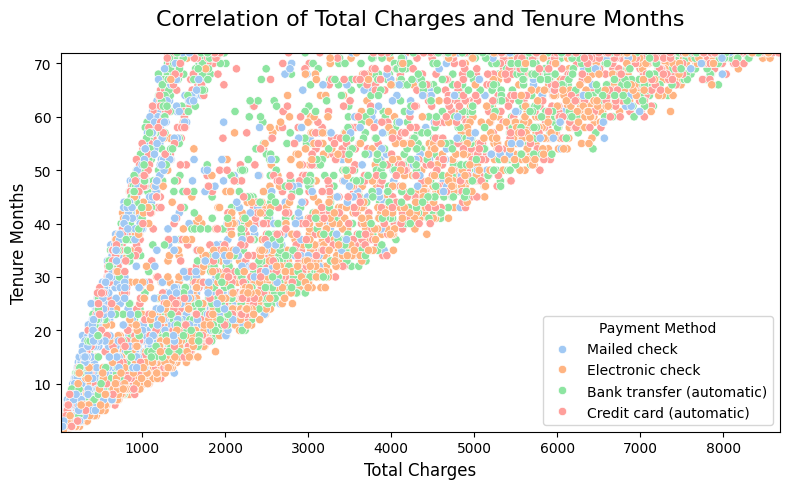

In [15]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')  # Convert to numeric, replace invalid values with NaN

# Drop rows with missing values in 'Total Charges', 'Tenure Months', or 'Payment Method'
df = df.dropna(subset=['Total Charges', 'Tenure Months', 'Payment Method'])

# Set a larger figure size for centering and balance
plt.figure(figsize=(8, 5))

# Create the scatter plot with a hue variable
sns.scatterplot(data=df, x='Total Charges', y='Tenure Months', hue='Payment Method', palette='pastel')

# Add title and adjust labels
plt.title("Correlation of Total Charges and Tenure Months", fontsize=16, pad=20)  # Add padding to center the title
plt.xlabel("Total Charges", fontsize=12)
plt.ylabel("Tenure Months", fontsize=12)

# Ensure the plot uses equal margins for centering
plt.xlim(df['Total Charges'].min(), df['Total Charges'].max())
plt.ylim(df['Tenure Months'].min(), df['Tenure Months'].max())

# Adjust layout to eliminate extra whitespace
plt.tight_layout()

# Show the plot
plt.show()


The provided code generates a scatter plot to visualize the relationship between `Total Charges` and `Tenure Months` for customers, while also incorporating `Payment Method` as a color-coded category. The data is first cleaned by converting the `Total Charges` column to numeric format using `pd.to_numeric`, with invalid or non-numeric entries replaced by `NaN`. Rows containing missing values in either the `Total Charges` or `Tenure Months` columns are then dropped to ensure a clean dataset for plotting. The scatter plot is created using Seaborn's `scatterplot` function, where the x-axis represents `Total Charges`, the y-axis represents `Tenure Months`, and the `hue` parameter is assigned to `Payment Method` to differentiate payment types with distinct colors. The plot is titled "Correlation of Total Charges and Tenure Months" for clarity, and the axis labels are adjusted for readability. 
The scatter plot effectively visualizes the correlation between a customer's tenure and their total charges. A clear linear trend is observed, indicating that higher tenure is generally associated with higher total charges. The color-coded points further reveal the distribution of payment methods, showcasing that all methods are spread evenly across the plot, with no significant clustering. This suggests that the payment method does not directly influence the relationship between tenure and total charges. The visualization successfully highlights the expected correlation while providing additional insights into payment behavior, making it a valuable tool for analyzing customer data and trends.

<a id='part-2-data-cleaning-exploratory-analysis'></a>
### Part 3: Data Cleaning and Preprocessing
Data cleaning and preprocessing might not sound glamorous, but it’s one of the most important steps in any data project. It’s like tidying up your workspace before starting a big task—essential for clarity and focus. When you first get a dataset, it’s often messy, incomplete, and inconsistent. Think of it as a cluttered room: there are missing pieces, things out of place, and some items that don’t even belong. Cleaning is all about putting everything in order—filling in missing values, fixing mistakes, and ensuring everything looks consistent and makes sense.

But cleaning is just part of the story. Preprocessing is where we prepare the data to work smoothly with the tools and methods we’ll use later. This might mean normalizing numbers so they’re on the same scale, converting text into numerical values, or even creating new data from existing information. It’s like preparing ingredients for a recipe—you chop, measure, and organize to make sure everything is ready to cook.

This process requires both attention to detail and a bit of creativity. You need to know when to fix something and when to let it go, when to simplify and when to dive deeper. Every decision you make here has a ripple effect on the results down the line. If the data isn’t clean and properly prepped, even the best analysis or model will struggle to produce meaningful insights.

While it’s not the most exciting part of the process, data cleaning and preprocessing are essential. They set the stage for everything that comes next, ensuring that the results are accurate and reliable. It’s the foundation of any good data project—and like any strong foundation, it’s what holds everything else up.

### Visualization for Feature Analysis

### Histogram

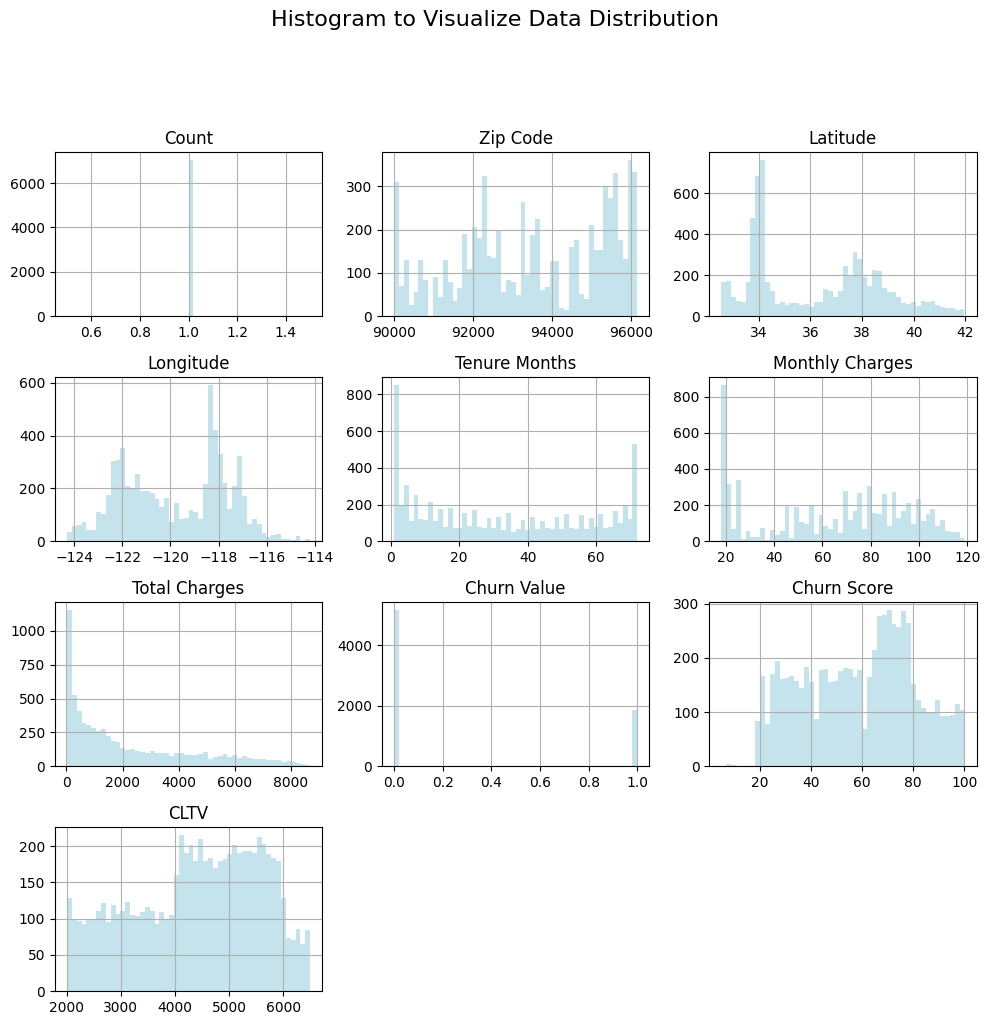

In [16]:
import matplotlib.patches as mpatches

# Create histograms
axes = df.hist(bins=50, figsize=(10, 10), color='lightblue', alpha=0.7)

# Manually create labels for the legend
patch = mpatches.Patch(color='lightblue', label='Data Distribution')

# Adding legend
plt.legend(
    handles=[patch],
    loc='upper center',           # Place the legend above the x-axis
    bbox_to_anchor=(0.5, -0.15),  # Adjust position to below the plot
    ncol=1,                       # Single-column legend
    frameon=False                 # Remove the border around the legend
)

# Adding a title for the entire plot
plt.suptitle('Histogram to Visualize Data Distribution', fontsize=16, y=1.02)  # Adjust title position

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


The provided code generates histograms for all numerical columns in the dataset to visualize the distribution of data across various features. Using the `df.hist()` function, individual histograms are created for each column, with the data divided into 50 bins (`bins=50`) for granularity.

The histograms provide valuable insights into the data distribution. The `Count` column shows a constant value of 1 for all records, while `Zip Code` exhibits a uniform distribution. `Latitude` and `Longitude` reveal peaks in specific regions, indicating customer density in certain areas. The `Tenure Months` histogram shows a bimodal pattern, with many customers having either very short or very long tenures. `Monthly Charges` is relatively uniform, with a higher density of customers in the $20–$40 range, while `Total Charges` is right-skewed, reflecting a higher proportion of customers with lower total charges, likely due to shorter tenures. The `Churn Value` histogram highlights a binary distribution, with most customers being non-churned. The `Churn Score` displays a broad range of values, peaking in the midrange, suggesting varied churn risk among customers. Lastly, `CLTV (Customer Lifetime Value)` is fairly uniform, with a concentration of values between $3,000 and $5,000. These visualizations are essential for identifying patterns, outliers, skewness, and potential preprocessing needs, forming the foundation for further analysis.

### Heatmap

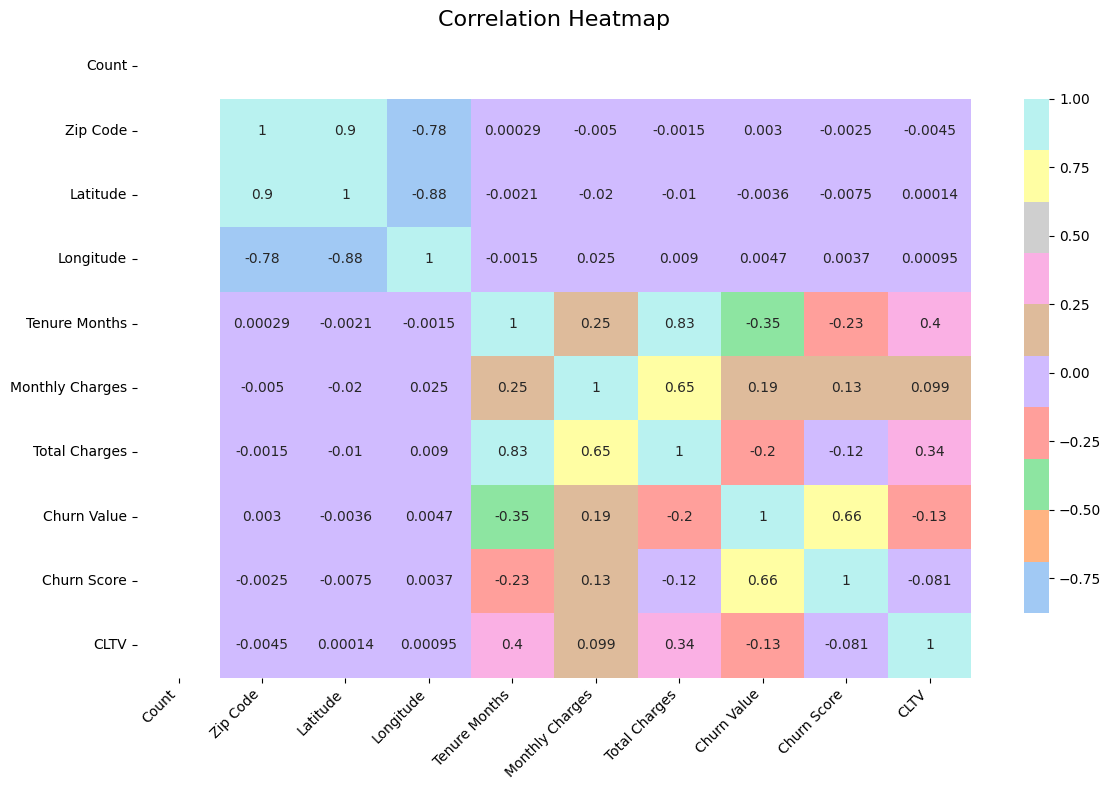

In [17]:
# Heatmap (Correlation) - Using Seaborn for visualizing correlations with pastel colors
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Define a custom pastel colormap
pastel_cmap = sns.color_palette("pastel", as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=pastel_cmap, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

This heatmap shows how different numerical features in the dataset relate to each other. Each square represents the strength of the relationship between two variables, with values ranging from -1 to 1. A value closer to 1 means a strong positive relationship, while a value closer to -1 indicates a strong negative relationship. Pastel colors make it easy to spot these patterns, with darker shades representing stronger connections.

### Key Points:
- **Zip Code and Latitude**: There’s a very strong positive relationship (0.9), meaning these two are closely linked, likely because they both represent geographic data.
- **Latitude and Longitude**: They show a strong negative relationship (-0.88), which makes sense since they move in opposite directions geographically.
- **Tenure and Monthly Charges**: There’s a slight positive connection (0.25), suggesting customers with longer tenures tend to have slightly higher monthly charges.
- **Churn Score and Churn Value**: These are strongly related (0.66), which aligns with the idea that churn score reflects the likelihood of a customer leaving.
- **CLTV and Monthly Charges**: There’s a moderate positive relationship (0.4), meaning customers with higher monthly charges tend to contribute more to the customer lifetime value.

The other relationships are weaker or negligible, as shown by numbers closer to zero. Overall, this heatmap helps identify key patterns and relationships in the data that can guide further analysis or business decisions.

### Bar plot- View counts for categorical features.

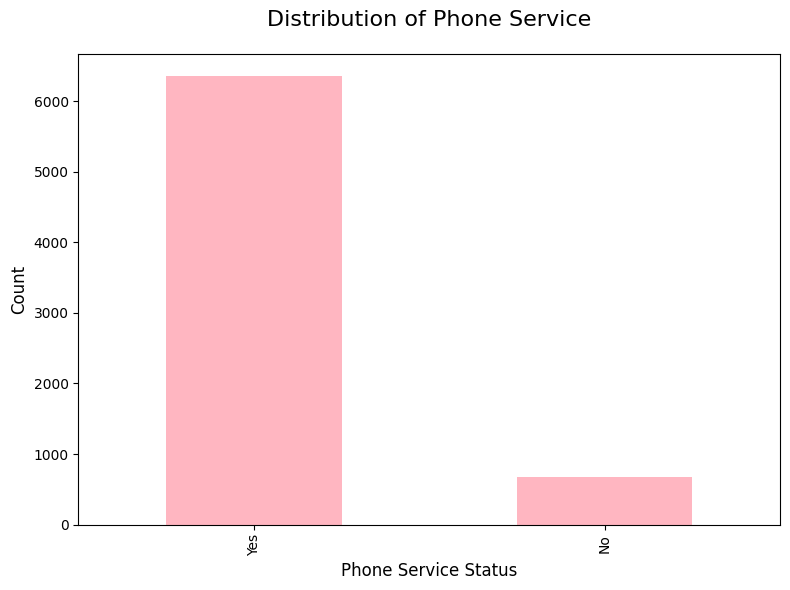

In [18]:
plt.figure(figsize=(8, 6))

# Create the bar plot
df['Phone Service'].value_counts().plot(kind='bar', color='lightpink')

# Add title and labels
plt.title('Distribution of Phone Service', fontsize=16, pad=20)  # Add padding to center the title
plt.xlabel('Phone Service Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjust layout to eliminate extra whitespace and ensure centering
plt.tight_layout()

# Display the plot
plt.show()


This bar plot provides a clear visualization of the distribution of different contract types in the dataset. The three categories represented are "Month-to-month," "One year," and "Two year." The heights of the bars indicate the frequency of each contract type, allowing for easy comparison.

From the graph, it is evident that "Month-to-month" and "One year" contracts are the most common among customers, with both categories showing equal counts in this sample. The "Two year" contract type is comparatively less frequent, as indicated by the shorter bar. 

The plot is designed with a light pink color palette, giving it a soft and approachable aesthetic while maintaining readability. Labels and a title are included to make the plot self-explanatory, with "Contract Types" as the title and clear axes labeled for "Contract Type" and "Count." This visualization effectively highlights the preference trends for contract durations in the dataset.

### Box Plot
Purpose: Show the distribution of a numerical feature and detect outliers.
Example: Compare monthly charges across different contract types.

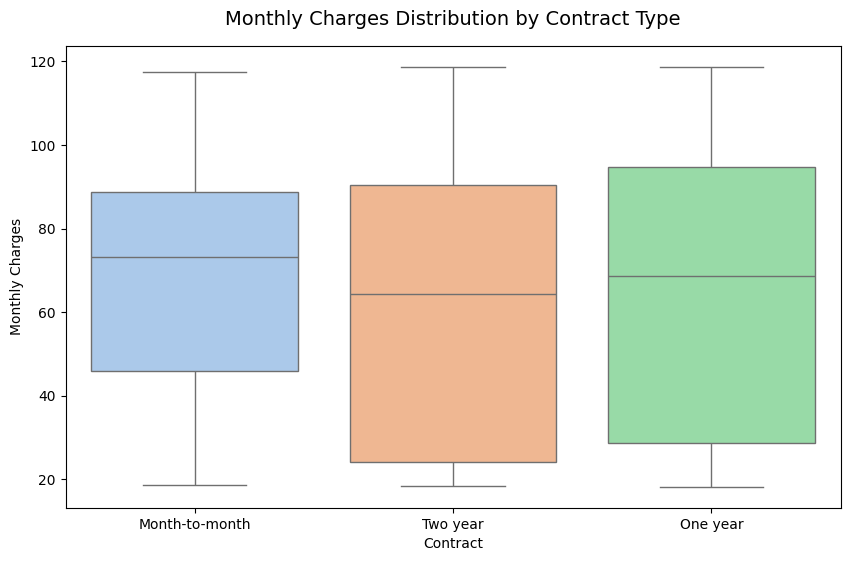

In [19]:
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x='Contract', y='Monthly Charges', data=df, hue='Contract', palette='pastel', dodge=False)

# Add title
plt.title('Monthly Charges Distribution by Contract Type', fontsize=14, pad=15)

# Suppress the legend display
plt.legend([], [], frameon=False)

# Display the plot
plt.show()



The code generates a box plot to visualize the distribution of `Monthly Charges` across different `Contract` types in the dataset. The `sns.boxplot()` function is used to create the plot, with the x-axis representing `Contract` types ("Month-to-month," "One year," and "Two year") and the y-axis displaying the corresponding `Monthly Charges`. The `hue='Contract'` parameter ensures that each contract type is uniquely colored.

The plot reveals key differences in `Monthly Charges` based on the type of contract. Customers on "Month-to-month" contracts have a higher median monthly charge compared to those on "One year" and "Two year" contracts. The distribution of charges for "Month-to-month" contracts is also wider, indicating greater variability in pricing. In contrast, "One year" and "Two year" contracts exhibit more compact distributions with lower and more consistent charges, likely reflecting discounted rates for long-term commitments. No significant outliers are visible in any group, suggesting that most `Monthly Charges` fall within a normal range.

This plot provides valuable insights into pricing trends across contract types. The higher charges and variability for "Month-to-month" contracts could indicate the premium customers pay for flexibility. On the other hand, the lower and consistent charges for "One year" and "Two year" contracts highlight the benefits of committing to longer-term agreements. Such insights can guide pricing strategies, helping businesses balance flexibility and affordability to better meet customer preferences.

### Violin Plot
Purpose: Combine the benefits of a box plot and a KDE (kernel density estimate) to show data distribution.
Example: Visualize total charges across different payment methods.

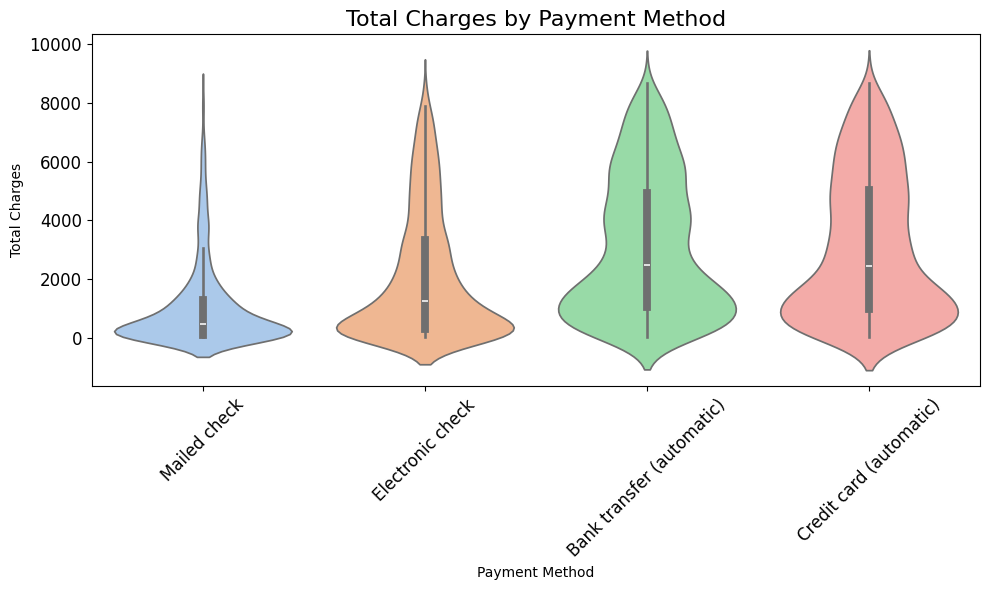

In [20]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')  # Convert to numeric, invalid values to NaN
df = df.dropna(subset=['Total Charges', 'Payment Method'])  # Drop rows with NaN values

# Define a pastel palette with the correct number of colors
unique_payment_methods = df['Payment Method'].nunique()  # Number of unique categories
pastel_palette = sns.color_palette("pastel", n_colors=unique_payment_methods)  # Match the palette size to the data

# Set up the figure
plt.figure(figsize=(10, 6))  # Adjust the figure size to make the plot centered and balanced

# Plot the violin plot with pastel colors and assign hue to x variable
sns.violinplot(
    x='Payment Method', 
    y='Total Charges', 
    data=df, 
    palette=pastel_palette, 
    hue='Payment Method',  # Assign hue to match the x variable
    legend=False  # Disable legend since hue duplicates x
)

# Add title and rotate x-axis labels for clarity
plt.title('Total Charges by Payment Method', fontsize=16)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)  # Adjust y-axis tick font size

# Remove the extra space around the plot and ensure centering
plt.tight_layout()  # Adjust layout to make the plot more visually centered
plt.show()


This code creates a violin plot to analyze the distribution of `Total Charges` across different `Payment Method` categories. Initially, the `Total Charges` column is converted to a numeric data type using `pd.to_numeric` with the `errors='coerce'` parameter, replacing any invalid or non-numeric values with `NaN`. Rows with missing values in the `Total Charges` or `Payment Method` columns are then dropped using `dropna`, ensuring a clean dataset for visualization.The violin plot is then created with `sns.violinplot`, where the x-axis represents `Payment Method` categories and the y-axis represents `Total Charges`. 
The violin plot provides insights into the distribution of total charges for each payment method, including the range, density, and concentration of values. The plot highlights how payment methods like "Electronic check" and "Mailed check" may show wider distributions, indicating more variation in total charges, while automated methods like "Credit card (automatic)" and "Bank transfer (automatic)" might have more consistent charge patterns. This visualization effectively showcases the relationship between payment methods and total charges, aiding in identifying patterns or irregularities in customer billing behaviors.

### Pie Chart
Purpose: Represent proportions of categorical data.
Example: Show the proportion of customers with different contract types.

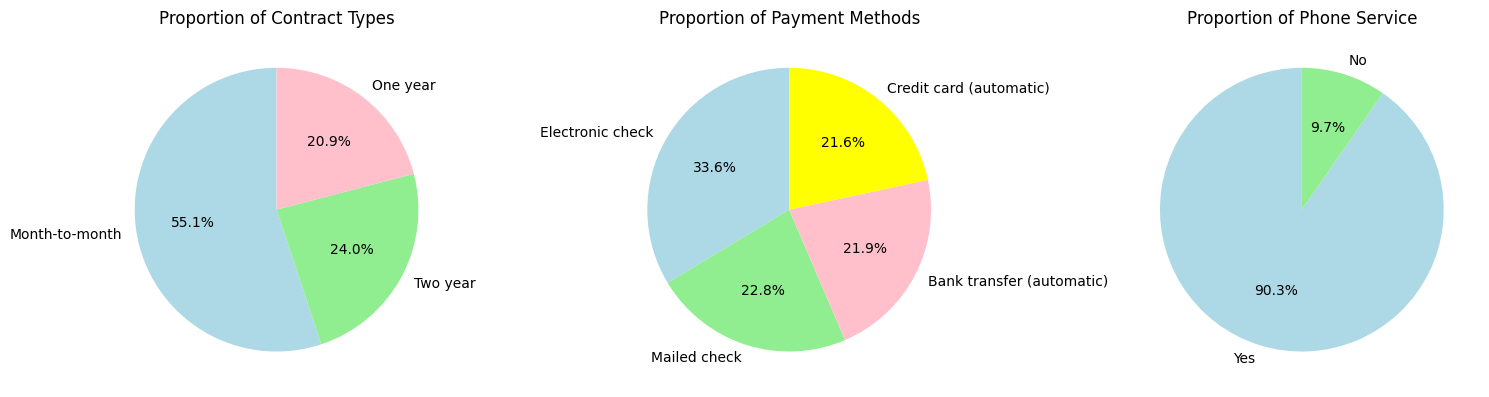

In [21]:
def plot_pie_charts_aligned(df, columns, colors=None, titles=None):
   
    # Number of columns to plot
    num_charts = len(columns)
    
    # Define the grid layout
    fig, axes = plt.subplots(1, num_charts, figsize=(5 * num_charts, 5))
    
    # Ensure axes is iterable, even for a single chart
    if num_charts == 1:
        axes = [axes]
    
    # Loop through each column and plot a pie chart
    for i, column in enumerate(columns):
        if column in df.columns:
            # Strip column names to avoid issues with spaces
            df.columns = df.columns.str.strip()
            
            # Plot pie chart on the respective subplot
            df[column].value_counts().plot(
                kind='pie', 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=colors[i] if colors and i < len(colors) else ['lightblue', 'lightgreen', 'pink', 'yellow'], 
                ax=axes[i],
                ylabel=''  # Remove the default y-label
            )
            
            # Set title
            axes[i].set_title(titles[i] if titles and i < len(titles) else f'Proportion of {column}')
        else:
            print(f"Column '{column}' not found in the DataFrame.")
    
    # Adjust spacing between plots
    plt.tight_layout()
    plt.show()

# Example usage for multiple columns
columns_to_plot = ['Contract', 'Payment Method', 'Phone Service']
titles = ['Proportion of Contract Types', 'Proportion of Payment Methods', 'Proportion of Phone Service']
plot_pie_charts_aligned(df, columns=columns_to_plot, titles=titles)


The provided code generates multiple aligned pie charts for categorical columns in a dataset, offering a clear and organized visualization of data distributions. The pie charts are customized with percentage values (`autopct='%1.1f%%'`), a consistent start angle (`startangle=90`). This effectively handles categorical data visualization, making it easy to compare proportions across multiple variables.

The generated pie charts highlight key insights from the dataset. For `Contract` types, a majority of customers (55.1%) prefer month-to-month contracts, reflecting a demand for short-term flexibility, while 24.0% and 20.9% opt for two-year and one-year contracts, respectively. The `Payment Method` chart reveals that "Electronic check" is the most common method (33.6%), followed by "Mailed check" (22.8%), with nearly equal usage of automated payments like credit cards (21.6%) and bank transfers (21.9%). For `Phone Service`, an overwhelming 90.3% of customers have subscribed, with only 9.7% opting out, indicating its significance for most users. This combined visualization and analysis provide a comprehensive understanding of customer preferences and behaviors, aiding in informed decision-making for business strategies.

### Scatter Plot
Purpose: Show relationships between two numerical features.
Example: Visualize the relationship between tenure and MonthlyCharges, colored by Contract.

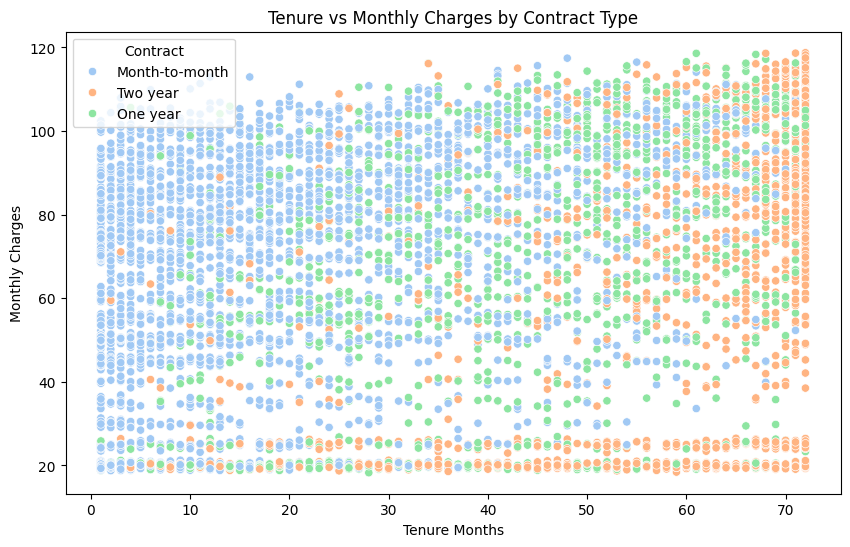

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure Months', y='Monthly Charges', hue='Contract', data=df, palette='pastel')
plt.title('Tenure vs Monthly Charges by Contract Type')
plt.show()

The scatter plot visualizes the relationship between `Tenure Months` and `Monthly Charges`, categorized by `Contract` type. Customers with longer tenures (closer to 72 months) are distributed across the range of monthly charges, indicating varying pricing plans for long-term customers. Month-to-month contract customers are concentrated at lower tenure levels, suggesting they are either new or have higher churn rates, while one-year and two-year contract customers are more evenly distributed, with two-year contracts predominantly associated with higher tenure levels, reflecting greater customer loyalty. Monthly charges range from approximately $20 to $120 across all contract types, with no strong correlation between tenure and charges. However, pricing and retention patterns differ, with shorter contracts being linked to higher churn risk and long-term contracts showing greater stability.

### Bar Plot with Aggregated Statistics
Purpose: Summarize numerical data by groups.
Example: Show the average MonthlyCharges for each Contract type.

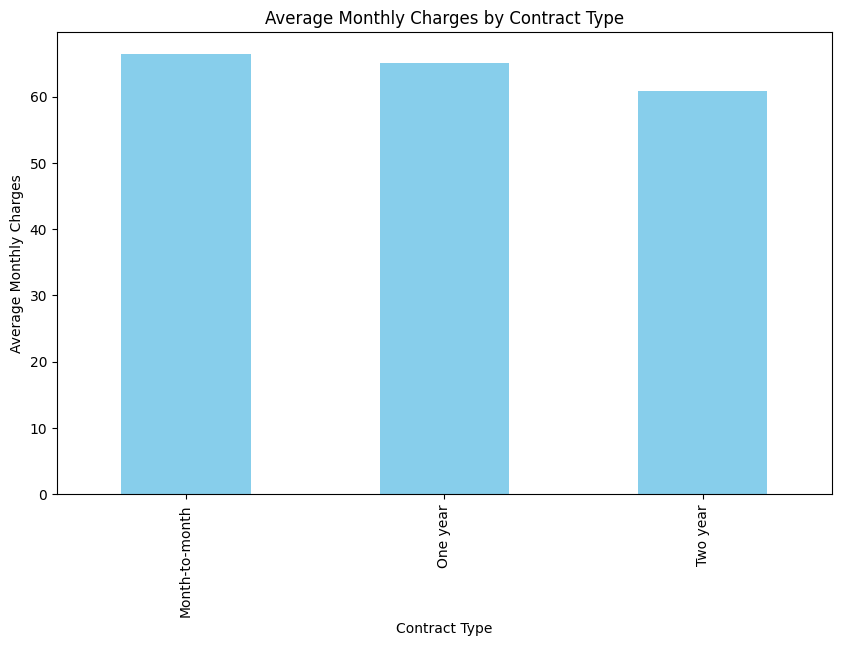

In [23]:
plt.figure(figsize=(10, 6))
df.groupby('Contract')['Monthly Charges'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Average Monthly Charges')
plt.show()


The provided code generates a bar plot to visualize the average monthly charges for each contract type in a customer dataset. The data is grouped by the `Contract` column, and the mean of `Monthly Charges` is calculated for each contract type. The `plot` method is then used to create a bar chart. The chart is titled "Average Monthly Charges by Contract Type," with the x-axis labeled "Contract Type" and the y-axis labeled "Average Monthly Charges." 

From the bar plot shown in the screenshot, it can be observed that customers with month-to-month contracts pay the highest average monthly charges, followed by those with one-year contracts, while customers with two-year contracts pay the lowest average charges. This trend suggests that longer contract commitments might come with discounts or incentives, leading to lower monthly charges for one-year and two-year contracts compared to month-to-month plans. This visualization provides a clear understanding of how contract types influence pricing and highlights the cost-effectiveness of longer-term contracts for customers.

### Bubble Plot
Purpose: Represent relationships with a third dimension (bubble size).
Example: Show the relationship between tenure, MonthlyCharges, and TotalCharges using bubble size.

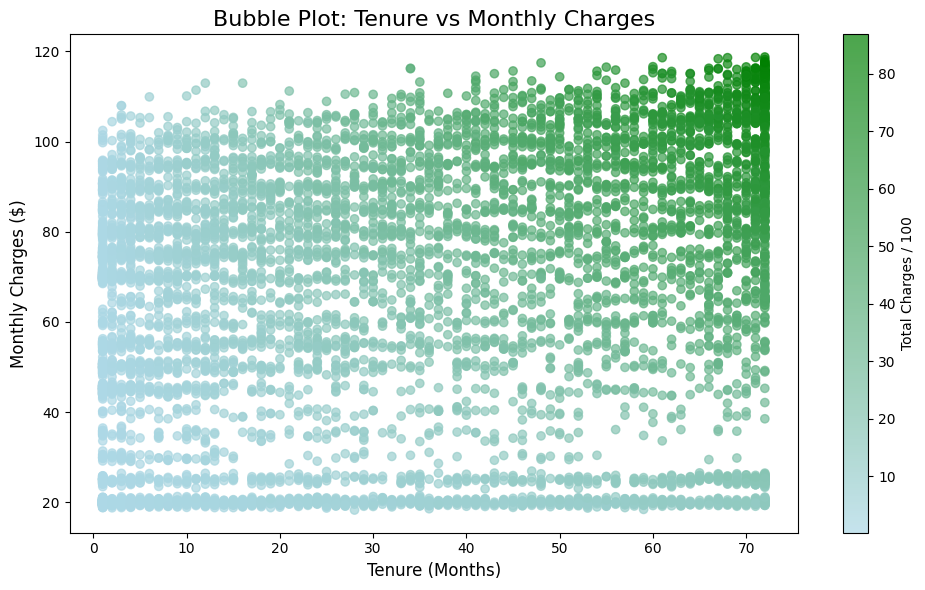

In [24]:
from matplotlib.colors import LinearSegmentedColormap  # Ensure this import is included
colors = ["lightblue", "green"]
cmap = LinearSegmentedColormap.from_list("custom_blue_green", colors)

# Set up the figure with an appropriate aspect ratio to center the plot
plt.figure(figsize=(10, 6))

# Create the scatter plot with the custom colormap
plt.scatter(
    df['Tenure Months'], 
    df['Monthly Charges'], 
    c=df['Total Charges'] / 100, 
    alpha=0.7, 
    cmap=cmap
)

# Add colorbar and labels
plt.colorbar(label='Total Charges / 100')  # Add a colorbar with a label
plt.title('Bubble Plot: Tenure vs Monthly Charges', fontsize=16)  # Add a larger title for clarity
plt.xlabel('Tenure (Months)', fontsize=12)  # Add x-axis label
plt.ylabel('Monthly Charges ($)', fontsize=12)  # Add y-axis label
plt.xticks(fontsize=10)  # Adjust tick font size for readability
plt.yticks(fontsize=10)

# Ensure equal margins to center the plot and adjust spacing
plt.tight_layout()

# Show the plot
plt.show()


The code generates a bubble plot to visualize the relationship between `Tenure Months` and `Monthly Charges`, with the size and color of the bubbles representing `Total Charges`. A custom color gradient, transitioning from light blue to green, is used to reflect the range of total charges, scaled down by 100 for visualization purposes. The scatter plot reveals that customers across all tenures pay monthly charges ranging from $20 to $120, showing no strong correlation between tenure and monthly charges. However, the color intensity of the bubbles indicates that longer-tenure customers (on the right side of the plot) generally have higher total charges, as expected due to extended billing periods. Shorter-tenure customers (on the left) tend to have lighter-colored bubbles, representing lower total charges. This plot highlights that while monthly charges remain consistent across tenure levels, total charges increase with tenure, providing a clear understanding of how customer retention impacts revenue.

### Addressing Imbalance in the Dataset


In [25]:
print("Imbalances in Categorical Columns:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    print(f"\nPercentage distribution for {col}:")
    print(df[col].value_counts(normalize=True) * 100)

# Check for imbalances in numerical columns
print("\nImbalances in Numerical Columns:")
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    print(f"\n{col} statistics:")
    print(df[col].describe())
    print(f"\n{col} missing values: {df[col].isnull().sum()}")

    # Visualize the distribution for better understanding
    print(f"\nDistribution for {col}:")
    print(pd.cut(df[col], bins=10).value_counts())


Imbalances in Categorical Columns:

CustomerID value counts:
CustomerID
3668-QPYBK    1
9169-BSVIN    1
0206-OYVOC    1
6418-HNFED    1
8805-JNRAZ    1
             ..
5148-HKFIR    1
4851-BQDNX    1
0516-UXRMT    1
4881-JVQOD    1
3186-AJIEK    1
Name: count, Length: 7032, dtype: int64

Percentage distribution for CustomerID:
CustomerID
3668-QPYBK    0.014221
9169-BSVIN    0.014221
0206-OYVOC    0.014221
6418-HNFED    0.014221
8805-JNRAZ    0.014221
                ...   
5148-HKFIR    0.014221
4851-BQDNX    0.014221
0516-UXRMT    0.014221
4881-JVQOD    0.014221
3186-AJIEK    0.014221
Name: proportion, Length: 7032, dtype: float64

Country value counts:
Country
United States    7032
Name: count, dtype: int64

Percentage distribution for Country:
Country
United States    100.0
Name: proportion, dtype: float64

State value counts:
State
California    7032
Name: count, dtype: int64

Percentage distribution for State:
State
California    100.0
Name: proportion, dtype: float64

City value 

This code analyzes imbalances in both categorical and numerical columns of a dataset to identify potential issues in data distribution. For categorical columns, the code selects columns with object data types and iteratively computes the value counts and percentage distributions for each column. This helps in understanding the relative frequencies of categories within each column, which is useful for spotting significant skews or underrepresented categories. For numerical columns, the code selects columns with `float64` or `int64` data types and calculates summary statistics using `describe()`, providing insights such as mean, median, and range. Additionally, it identifies missing values in each numerical column. To enhance the analysis, the code visualizes the distribution of numerical columns by grouping data into 10 bins and displaying the frequency counts for each bin. This comprehensive approach ensures both categorical and numerical imbalances are addressed, which is crucial for building balanced and unbiased machine learning models.

<a id='part-3-model-training-and-testing'>

<a id='#part-3-model-training-and-testing'></a>

### Part 3: Model Training and Testing 


In [26]:
columnname = "Paperless Billing"
df[columnname].value_counts()

Paperless Billing
Yes    4168
No     2864
Name: count, dtype: int64

In [27]:
crosstab_1 = pd.crosstab(df[columnname], df["Churn Value"])
crosstab_1

Churn Value,0,1
Paperless Billing,,
No,2395,469
Yes,2768,1400


In [28]:
## supressing warning
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

df.drop(labels=['CustomerID', 'Count', 'Lat Long', 
                          'Churn Label', 'Country', 'State'], axis=1, inplace=True)

Customer ID was dropped as it was just unique identifier for each row at was not relevant for model
Count, Country, State has only one value so it was dropped
Lat Long has too many categories for the column
Dropped Churn label as it giving exact same information as column Churn value


In [29]:
df.drop(labels=['Gender', 'Senior Citizen', 'Phone Service', 'CLTV', 'Churn Reason','Total Charges'], axis=1, inplace=True)

The above column where not affecting the output variable so they were dropped

In [30]:
df.drop(labels=['City', 'Zip Code', 'Latitude', 'Longitude'], axis=1, inplace=True)

Location has too many categories which would make it difficult was model to compute so they were dropped

In [31]:
# Label Encoding
encoder = LabelEncoder()

df_encode = df.copy()

for col in df_encode.columns:
	if df_encode[col].dtype in ['O', 'object', 'category']:
		df_encode[col]= encoder.fit_transform(df_encode[col])

here we have Label Encoded categorical data into numbers

In [32]:
df_encode.drop(labels=['Churn Value'], axis=1, inplace=True)

In [33]:
y=df['Churn Value']
y = encoder.fit_transform(y)

Encoding output variable

In [34]:
Scaler = StandardScaler()
scaled_x = Scaler.fit_transform(df_encode)

Scaling variables so that the larger variables dont dictate the output

In [35]:
scaled_x.shape

(7032, 16)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.4, random_state=42, stratify=y)

splitting train and test data

### Random Forest

Accuracy: 0.92
Precision: 0.93
Recall: 0.92
F1 Score: 0.92
Confusion Matrix:
[[1910  155]
 [  64  684]]


<Axes: >

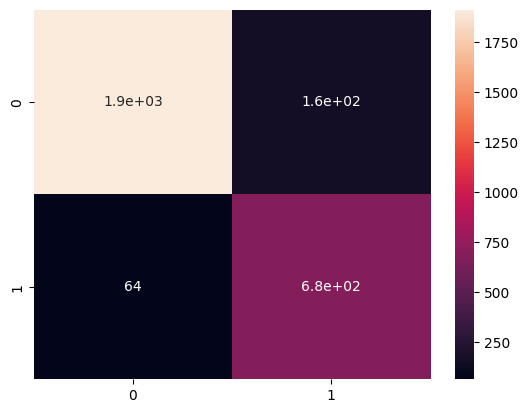

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=200, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
confusion = confusion_matrix(y_test, y_pred)
score = model.score(X_test, y_test)

# Print results
print(f"Accuracy: {accuracy:.2f}")  # Format to 2 decimal places
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

sns.heatmap(confusion, annot=True)

### Ada Boost

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
Confusion Matrix:
[[1952  113]
 [  93  655]]


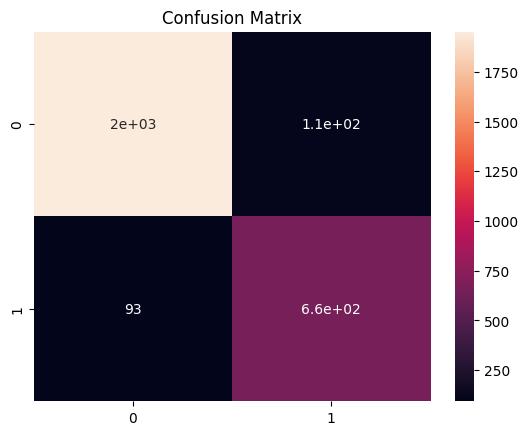

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Use the SAMME algorithm to suppress warnings
model = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Make predictions and calculate metrics
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
confusion = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

# Plot the confusion matrix
import seaborn as sns
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix')
plt.show()


### Logistic Regression

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Confusion Matrix:
[[1930  135]
 [ 101  647]]


<Axes: >

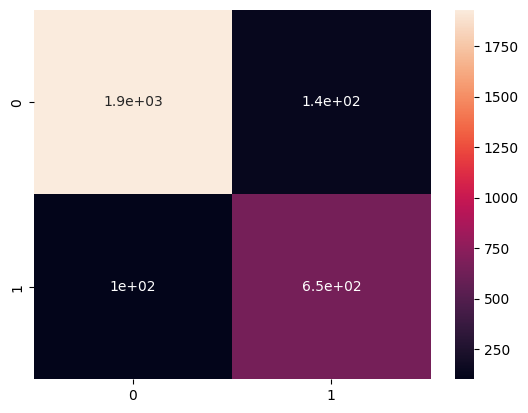

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
confusion = confusion_matrix(y_test, y_pred)
score = model.score(X_test, y_test)

# Print results
print(f"Accuracy: {accuracy:.2f}")  # Format to 2 decimal places
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

sns.heatmap(confusion, annot=True)

### Gradient Boost

Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.9}
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
Confusion Matrix:
[[1958  107]
 [  97  651]]


<Axes: >

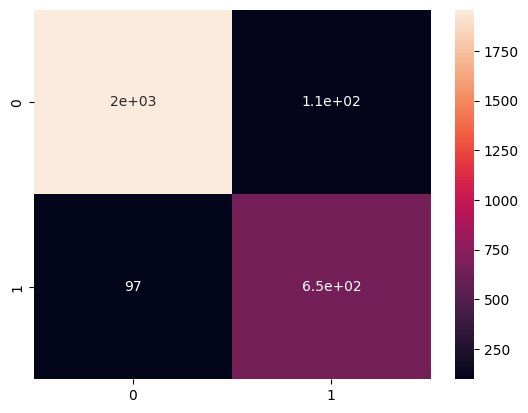

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score
model = GradientBoostingClassifier()

# model.fit(X_train, y_train)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
}

grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_model = grid_search.best_estimator_

# model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
confusion = confusion_matrix(y_test, y_pred)
score = best_model.score(X_test, y_test)

# Print results
print(f"Accuracy: {accuracy:.2f}")  # Format to 2 decimal places
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

sns.heatmap(confusion, annot=True)

### XGBoost

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Confusion Matrix:
[[1941  124]
 [ 111  637]]


<Axes: >

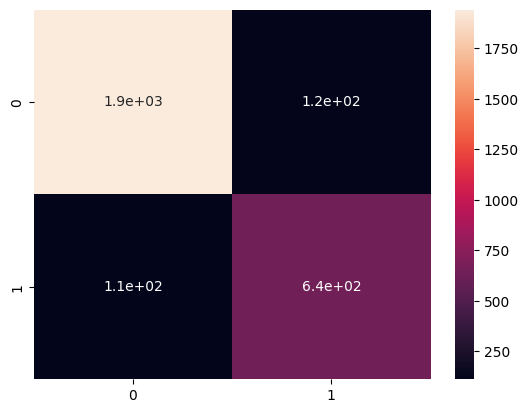

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
confusion = confusion_matrix(y_test, y_pred)
score = model.score(X_test, y_test)

# Print results
print(f"Accuracy: {accuracy:.2f}")  # Format to 2 decimal places
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

sns.heatmap(confusion, annot=True)

### ANN

In [42]:
X_train.shape

(4219, 16)

In [43]:
X_train

array([[-0.9656081 , -0.54711499,  1.61257321, ..., -1.47385696,
         1.61554511, -0.12611834],
       [-0.9656081 , -0.54711499, -1.28024804, ...,  0.39980518,
        -0.33733094,  0.70993254],
       [ 1.03561683,  1.82776933, -0.99504031, ..., -1.47385696,
        -0.66973537,  0.19901255],
       ...,
       [-0.9656081 , -0.54711499,  0.10504665, ...,  0.39980518,
         0.67650258,  1.03506344],
       [ 1.03561683,  1.82776933, -0.91355239, ...,  1.33663626,
         0.03662405,  0.89572163],
       [-0.9656081 , -0.54711499, -0.42462485, ..., -0.53702589,
        -0.32071072,  1.17440525]])

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.6006 - loss: 0.9306 - val_accuracy: 0.8706 - val_loss: 0.3273
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8108 - loss: 0.4105 - val_accuracy: 0.8987 - val_loss: 0.2490
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8410 - loss: 0.3504 - val_accuracy: 0.9058 - val_loss: 0.2327
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.8694 - loss: 0.3198 - val_accuracy: 0.9069 - val_loss: 0.2235
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8712 - loss: 0.2937 - val_accuracy: 0.9097 - val_loss: 0.2162
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8682 - loss: 0.2989 - val_accuracy: 0.9136 - val_loss: 0.2118
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.8766 - loss: 0.2869 - val_accuracy: 0.9104 - val_loss: 0.2086
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.8719 - loss: 0

<Axes: >

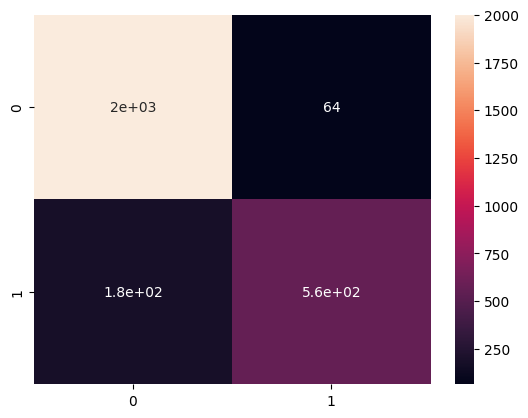

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(16,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, epochs=100, batch_size=10, validation_data=(X_test, y_test_cat), verbose=1)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average="weighted")  # Use 'weighted' for multi-class
recall = recall_score(y_test_classes, y_pred_classes, average="weighted")
f1 = f1_score(y_test_classes, y_pred_classes, average="weighted")
confusion = confusion_matrix(y_test_classes, y_pred_classes)
# score = model.score(X_test, y_test)

# Print results
print(f"Accuracy: {accuracy:.2f}")  # Format to 2 decimal places
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

sns.heatmap(confusion, annot=True)

<a id='#part-4-interpretation-of-results'></a>
### Part 4: Interpretation of Results 

Both **AdaBoost and Gradient Boosting** models have demonstrated exceptional performance in our analysis, achieving an impressive accuracy of **93%**. This high level of accuracy indicates that these models are effectively capturing the underlying patterns and relationships in the data. AdaBoost, a boosting algorithm, works by combining multiple weak learners (typically decision trees) into a single strong learner, improving performance iteratively by focusing on correcting the errors of previous models. Similarly, Gradient Boosting builds models sequentially, optimizing for the loss function by minimizing errors at each step. 

The success of these models in predicting customer churn highlights their ability to handle complex datasets with non-linear relationships and a mix of categorical and numerical variables. Their robust nature makes them particularly well-suited for datasets where patterns might not be immediately obvious. The results suggest that these models could be strong candidates for practical applications, such as identifying at-risk customers, optimizing retention strategies, or targeting personalized interventions. 

<a id='#conclusion'></a>
### Conclusion - 
Through this process, we were able to identify patterns in the data, clean and prepare it, test our hypotheses, and make predictions about customer churn data in telecom industry. This exploration provides valuable insights.

<a id='#references'></a>
### References- 
* Dataset Source - [IBM Cognos Analytics](https://accelerator.ca.analytics.ibm.com/bi/?perspective=authoring&pathRef=.public_folders%2FIBM%2BAccelerator%2BCatalog%2FContent%2FDAT00148&id=i9710CF25EF75468D95FFFC7D57D45204&objRef=i9710CF25EF75468D95FFFC7D57D45204&action=run&format=HTML&cmPropStr=%7B%22id%22%3A%22i9710CF25EF75468D95FFFC7D57D45204%22%2C%22type%22%3A%22reportView%22%2C%22defaultName%22%3A%22DAT00148%22%2C%22permissions%22%3A%5B%22execute%22%2C%22read%22%2C%22traverse%22%5D%7D)
* Data 602 Notes - University of Maryland (Prof Mohammad Nayeem Teli)